In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)

from bsmodel import BSModel

import numpy as np
import matplotlib.pyplot as plt
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
from pathlib import Path

In [2]:
bs.set_bridgestan_path("/mnt/c/Users/jccer/bridgestan")

In [3]:
bs_model = BSModel(stan_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_exponential.stan",
                   data_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_exponential.json")

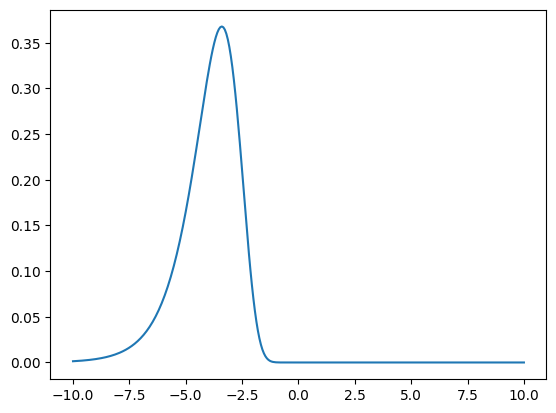

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model.log_density(np.array([xxn]), propto = False)) for xxn in xx]
plt.plot(xx, fxx, label = "model")

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model.log_density(np.array([xxn]), propto = False)) for xxn in xx]

def plot_combined(mu = 0.0, sigma = 1.0):
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    plt.figure(figsize = (8, 5))
    
    plt.plot(x, y, label = f'Normal: μ = {mu:.2f}, σ = {sigma:.2f}', color = 'blue')
    plt.axvline(mu, color = 'red', linestyle = '--', label = 'Mean (μ)')
    
    plt.plot(xx, fxx, label = 'Stan Model', color = 'green')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Stan Model vs Normal Distribution')
    plt.grid(True)
    plt.minorticks_on()
    plt.legend()
    plt.show()

interact(plot_combined,
         mu = FloatSlider(value = 0.0, min = -10.0, max = 10.0, step = 0.01, description = 'μ (mean)'),
         sigma = FloatSlider(value = 0.01, min = 0.01, max = 10.0, step = 0.01, description = 'σ (std)'))

interactive(children=(FloatSlider(value=0.0, description='μ (mean)', max=10.0, min=-10.0, step=0.01), FloatSli…

<function __main__.plot_combined(mu=0.0, sigma=1.0)>

In [6]:
bs_model2 = BSModel(stan_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_normal.stan",
                   data_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_normal.json")

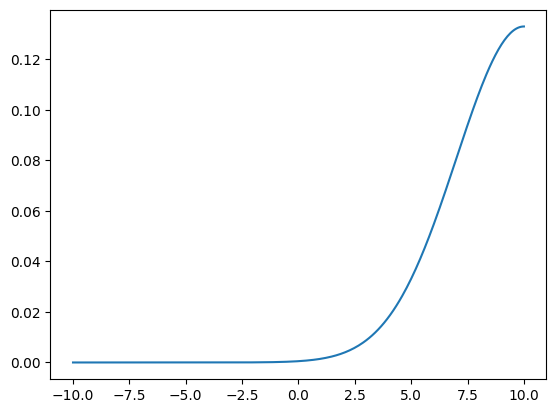

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model2.log_density(np.array([xxn]), propto = False)) for xxn in xx]
plt.plot(xx, fxx, label = "model")

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model2.log_density(np.array([xxn]), propto = False)) for xxn in xx]

def plot_combined(mu = 0.0, sigma = 1.0):
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    plt.figure(figsize = (8, 5))
    
    plt.plot(x, y, label = f'Normal: μ = {mu:.2f}, σ = {sigma:.2f}', color = 'blue')
    plt.axvline(mu, color = 'red', linestyle = '--', label = 'Mean (μ)')
    
    plt.plot(xx, fxx, label = 'Stan Model', color = 'green')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Stan Model vs Normal Distribution')
    plt.grid(True)
    plt.minorticks_on()
    plt.legend()
    plt.show()

interact(plot_combined,
         mu = FloatSlider(value = 0.0, min = -10.0, max = 10.0, step = 0.01, description = 'μ (mean)'),
         sigma = FloatSlider(value = 0.01, min = 0.01, max = 10.0, step = 0.01, description = 'σ (std)'))

interactive(children=(FloatSlider(value=0.0, description='μ (mean)', max=10.0, min=-10.0, step=0.01), FloatSli…

<function __main__.plot_combined(mu=0.0, sigma=1.0)>

In [9]:
bs_model3 = BSModel(stan_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_t.stan",
                   data_file = "/mnt/c/Users/jccer/mcmcexperiments/stan/one_t.json")

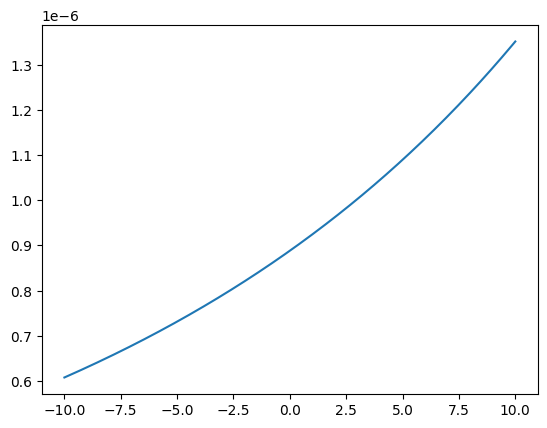

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model3.log_density(np.array([xxn]), propto = False)) for xxn in xx]
plt.plot(xx, fxx, label = "model")

In [ ]:
xx = np.linspace(-10, 10, 301)
fxx = [np.exp(bs_model3.log_density(np.array([xxn]), propto = False)) for xxn in xx]

def plot_combined(mu = 0.0, sigma = 1.0):
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    plt.figure(figsize = (8, 5))
    
    plt.plot(x, y, label = f'Normal: μ = {mu:.2f}, σ = {sigma:.2f}', color = 'blue')
    plt.axvline(mu, color = 'red', linestyle = '--', label = 'Mean (μ)')
    
    plt.plot(xx, fxx, label = 'Stan Model', color = 'green')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Stan Model vs Normal Distribution')
    plt.grid(True)
    plt.minorticks_on()
    plt.legend()
    plt.show()

interact(plot_combined,
         mu = FloatSlider(value = 0.0, min = -10.0, max = 10.0, step = 0.01, description = 'μ (mean)'),
         sigma = FloatSlider(value = 0.01, min = 0.01, max = 10.0, step = 0.01, description = 'σ (std)'))

interactive(children=(FloatSlider(value=0.0, description='μ (mean)', max=10.0, min=-10.0, step=0.01), FloatSli…

<function __main__.plot_combined(mu=0.0, sigma=1.0)>

In [12]:
def plot_normal_pdf(mu = 0.0, sigma = 1.0):
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)
    
    plt.figure(figsize = (8, 5))
    plt.plot(x, y, label = f'μ = {mu: .2f}, σ = {sigma: .2f}')
    plt.axvline(mu, color = 'red', linestyle = '--', label = 'Mean (μ)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Interactive Normal Distribution PDF')
    plt.grid(True)
    plt.minorticks_on()
    plt.legend()
    plt.show()

interact(plot_normal_pdf,
         mu = FloatSlider(value = 0.0, min = -50.0, max = 50.0, step = 0.01, description ='μ (mean)'),
         sigma = FloatSlider(value = 0.01, min = 0.01, max = 50.0, step = 0.01, description ='σ (std)'))

interactive(children=(FloatSlider(value=0.0, description='μ (mean)', max=50.0, min=-50.0, step=0.01), FloatSli…

<function __main__.plot_normal_pdf(mu=0.0, sigma=1.0)>